# Logistic Regression

---

#### Logistic Function (Sigmoid):

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

The predicted value from the linear regression part (θ^Tx) is passed through the sigmoid function to obtain the predicted probability of the positive class.

#### Maximum Likelihood Estimation (MLE）：

$$\text{MLE}(\theta) = \prod_{i=1}^{m}h_\theta(x^{(i)})^{y^{(i)}}(1 - h_\theta(x^{(i)}))^{1 - y^{(i)}}$$

#### Cost Function (Negative Log-Likelihood): 
$$J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}\left[y^{(i)}\log(h_\theta(x^{(i)})) + (1-y^{(i)})\log(1 - h_\theta(x^{(i)}))\right]$$

Minimizing the negative log-likelihood in logistic regression is equivalent to maximizing the likelihood, as both approaches seek to find the parameter values that maximize the probability of observing the true class labels in the training data.

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create the dataset
data = pd.DataFrame({
    'X1': [2.75, 1.85, 3.25, 2.85, 3.45, 4.50, 4.75, 5.25, 5.65, 6.20],
    'X2': [1.25, 1.20, 2.10, 2.45, 2.40, 3.60, 4.00, 4.35, 5.00, 5.50],
    'Y': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
})

# Separate features and target
X = data[['X1', 'X2']]
y = data['Y']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the logistic regression model
lr_model = LogisticRegression()

# Fit the model to the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


C:\Users\jaspe\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


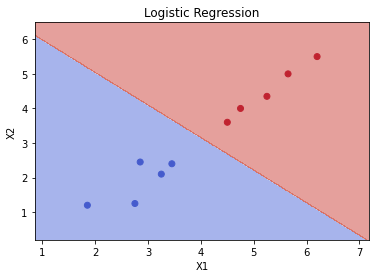

In [8]:
import matplotlib.pyplot as plt

# Plot the data points and decision boundary
plt.scatter(data['X1'], data['X2'], c=data['Y'], cmap='coolwarm')  # Plot the data points with different colors based on class label
plt.xlabel('X1')  # Set the x-axis label
plt.ylabel('X2')  # Set the y-axis label
plt.title('Logistic Regression')  # Set the title of the plot

# Define the range of the plot
x1_min, x1_max = data['X1'].min() - 1, data['X1'].max() + 1  # Minimum and maximum values for X1 with padding
x2_min, x2_max = data['X2'].min() - 1, data['X2'].max() + 1  # Minimum and maximum values for X2 with padding

# Create a grid of points within the defined range
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                       np.arange(x2_min, x2_max, 0.01))

# Predict the class labels for each point in the grid
Z = lr_model.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

# Plot the decision boundary
plt.contourf(xx1, xx2, Z, alpha=0.5, cmap='coolwarm')  # Plot filled contour based on predictions
plt.show()  # Display the plot
